In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [78]:
df=pd.read_csv("jfk_weather_data_Set.csv")
df1=pd.read_csv("jfk_weather_data_Set.csv")
print(df.head())
df.describe()

                  DATE  HOURLYVISIBILITY  HOURLYDRYBULBTEMPF  \
0  2010-01-01 01:00:00               6.0                33.0   
1  2010-01-01 02:00:00               6.0                33.0   
2  2010-01-01 03:00:00               5.0                33.0   
3  2010-01-01 04:00:00               5.0                33.0   
4  2010-01-01 05:00:00               5.0                33.0   

   HOURLYWETBULBTEMPF  HOURLYDewPointTempF  HOURLYRelativeHumidity  \
0                32.0                 31.0                    92.0   
1                33.0                 32.0                    96.0   
2                33.0                 32.0                    96.0   
3                33.0                 32.0                    96.0   
4                32.0                 31.0                    92.0   

   HOURLYWindSpeed  HOURLYStationPressure  HOURLYSeaLevelPressure  \
0              0.0                  29.97                   29.99   
1              0.0                  29.97               

,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
count,75119.000000,75119.000000,75119.000000,75119.000000,75119.000000,75119.000000,75119.000000,75119.000000,75119.000000,75119.000000,75119.000000,7.511900e+04,75119.000000,75119.000000,75119.000000
mean,9.205796,55.355509,49.333830,42.422223,64.809942,11.252965,30.005124,30.026116,0.004574,30.025137,-0.166465,2.867949e-02,0.503468,0.490835,0.005698
std,2.209374,17.393210,16.178678,19.577775,19.899904,6.099392,0.234245,0.233949,0.033581,0.234212,0.629050,7.587989e-01,0.499991,0.499919,0.075268
min,0.000000,1.000000,-1.000000,-19.000000,8.000000,0.000000,28.490000,28.540000,0.000000,28.510000,-1.000000,-1.000000e+00,0.000000,0.000000,0.000000
25%,10.000000,42.000000,36.000000,27.000000,49.000000,7.000000,29.860000,29.880000,0.000000,29.880000,-0.766044,-7.660440e-01,0.000000,0.000000,0.000000
50%,10.000000,56.000000,50.000000,44.000000,66.000000,10.000000,30.000000,30.020000,0.000000,30.020000,-0.173648,6.123230e-17,1.000000,0.000000,0.000000
75%,10.000000,70.000000,63.000000,59.000000,82.000000,15.000000,30.150000,30.170000,0.000000,30.170000,0.342020,7.660440e-01,1.000000,1.000000,0.000000
max,10.000000,102.000000,85.000000,84.000000,100.000000,53.000000,30.830000,30.850000,2.410000,30.850000,1.000000,1.000000e+00,1.000000,1.000000,1.000000


In [79]:
# Get the number of attributes (columns)
num_attributes = len(df.columns)

print("Number of attributes:", num_attributes)

Number of attributes: 16


In [80]:
df1.head()

,DATE,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
0,2010-01-01 01:00:00,6.0,33.0,32.0,31.0,92.0,0.0,29.97,29.99,0.01,29.99,0.0,1.0,0,1,0
1,2010-01-01 02:00:00,6.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.02,29.99,0.0,1.0,0,1,0
2,2010-01-01 03:00:00,5.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.00,29.99,0.0,1.0,0,1,0
3,2010-01-01 04:00:00,5.0,33.0,33.0,32.0,96.0,0.0,29.95,29.97,0.00,29.97,0.0,1.0,0,1,0
4,2010-01-01 05:00:00,5.0,33.0,32.0,31.0,92.0,0.0,29.93,29.96,0.00,29.95,0.0,1.0,0,1,0


In [81]:
# Check for null values in the DataFrame
print("Null Values:")
print(df.isnull().sum())

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical_columns)

Null Values:
DATE                          0
HOURLYVISIBILITY              0
HOURLYDRYBULBTEMPF            0
HOURLYWETBULBTEMPF            0
HOURLYDewPointTempF           0
HOURLYRelativeHumidity        0
HOURLYWindSpeed               0
HOURLYStationPressure         0
HOURLYSeaLevelPressure        0
HOURLYPrecip                  0
HOURLYAltimeterSetting        0
HOURLYWindDirectionSin        0
HOURLYWindDirectionCos        0
HOURLYPressureTendencyIncr    0
HOURLYPressureTendencyDecr    0
HOURLYPressureTendencyCons    0
dtype: int64
Categorical Columns:
Index(['DATE'], dtype='object')


In [82]:
df1.drop('DATE', axis=1, inplace=True)

In [83]:
df1

,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
0,6.0,33.0,32.0,31.0,92.0,0.0,29.97,29.99,0.01,29.99,0.000000,1.000000,0,1,0
1,6.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.02,29.99,0.000000,1.000000,0,1,0
2,5.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.00,29.99,0.000000,1.000000,0,1,0
3,5.0,33.0,33.0,32.0,96.0,0.0,29.95,29.97,0.00,29.97,0.000000,1.000000,0,1,0
4,5.0,33.0,32.0,31.0,92.0,0.0,29.93,29.96,0.00,29.95,0.000000,1.000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75114,10.0,76.0,73.0,72.0,88.0,3.0,30.00,30.02,0.00,30.02,-0.766044,-0.642788,1,0,0
75115,4.0,69.0,69.0,69.0,100.0,13.0,29.99,30.01,1.16,30.01,0.642788,0.766044,1,0,0
75116,10.0,71.0,70.0,70.0,96.0,0.0,30.02,30.04,0.01,30.04,0.000000,1.000000,1,0,0
75117,10.0,72.0,71.0,70.0,94.0,5.0,30.00,30.02,0.00,30.02,0.766044,0.642788,1,0,0


In [84]:
df

,DATE,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
0,2010-01-01 01:00:00,6.0,33.0,32.0,31.0,92.0,0.0,29.97,29.99,0.01,29.99,0.000000,1.000000,0,1,0
1,2010-01-01 02:00:00,6.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.02,29.99,0.000000,1.000000,0,1,0
2,2010-01-01 03:00:00,5.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.00,29.99,0.000000,1.000000,0,1,0
3,2010-01-01 04:00:00,5.0,33.0,33.0,32.0,96.0,0.0,29.95,29.97,0.00,29.97,0.000000,1.000000,0,1,0
4,2010-01-01 05:00:00,5.0,33.0,32.0,31.0,92.0,0.0,29.93,29.96,0.00,29.95,0.000000,1.000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75114,2018-07-27 19:00:00,10.0,76.0,73.0,72.0,88.0,3.0,30.00,30.02,0.00,30.02,-0.766044,-0.642788,1,0,0
75115,2018-07-27 20:00:00,4.0,69.0,69.0,69.0,100.0,13.0,29.99,30.01,1.16,30.01,0.642788,0.766044,1,0,0
75116,2018-07-27 21:00:00,10.0,71.0,70.0,70.0,96.0,0.0,30.02,30.04,0.01,30.04,0.000000,1.000000,1,0,0
75117,2018-07-27 22:00:00,10.0,72.0,71.0,70.0,94.0,5.0,30.00,30.02,0.00,30.02,0.766044,0.642788,1,0,0


In [85]:
print(df.isnull().sum())

DATE                          0
HOURLYVISIBILITY              0
HOURLYDRYBULBTEMPF            0
HOURLYWETBULBTEMPF            0
HOURLYDewPointTempF           0
HOURLYRelativeHumidity        0
HOURLYWindSpeed               0
HOURLYStationPressure         0
HOURLYSeaLevelPressure        0
HOURLYPrecip                  0
HOURLYAltimeterSetting        0
HOURLYWindDirectionSin        0
HOURLYWindDirectionCos        0
HOURLYPressureTendencyIncr    0
HOURLYPressureTendencyDecr    0
HOURLYPressureTendencyCons    0
dtype: int64


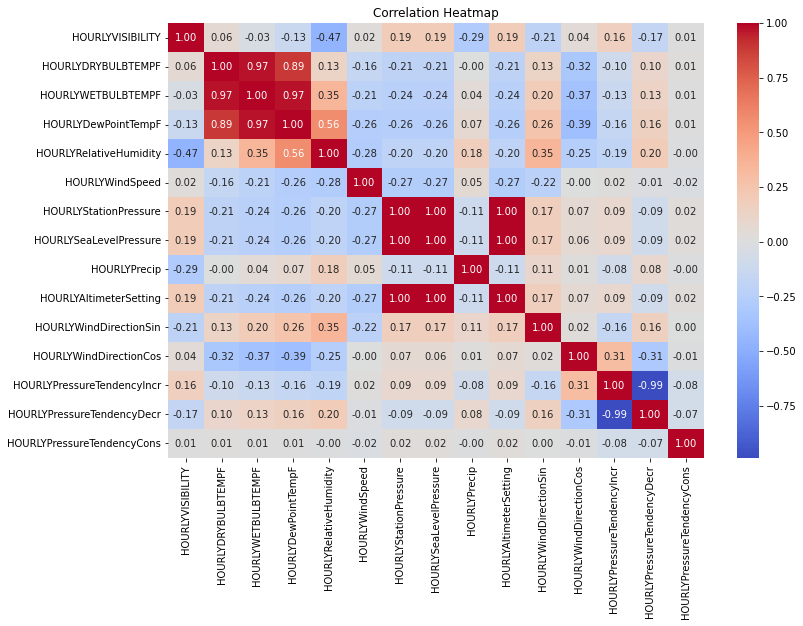

In [86]:
# Compute the correlation matrix
correlation_matrix = df1.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Attributes with correlation > 0.7: ['HOURLYPressureTendencyIncr', 'HOURLYSeaLevelPressure', 'HOURLYPressureTendencyDecr', 'HOURLYDRYBULBTEMPF', 'HOURLYDewPointTempF', 'HOURLYStationPressure', 'HOURLYAltimeterSetting', 'HOURLYWETBULBTEMPF']


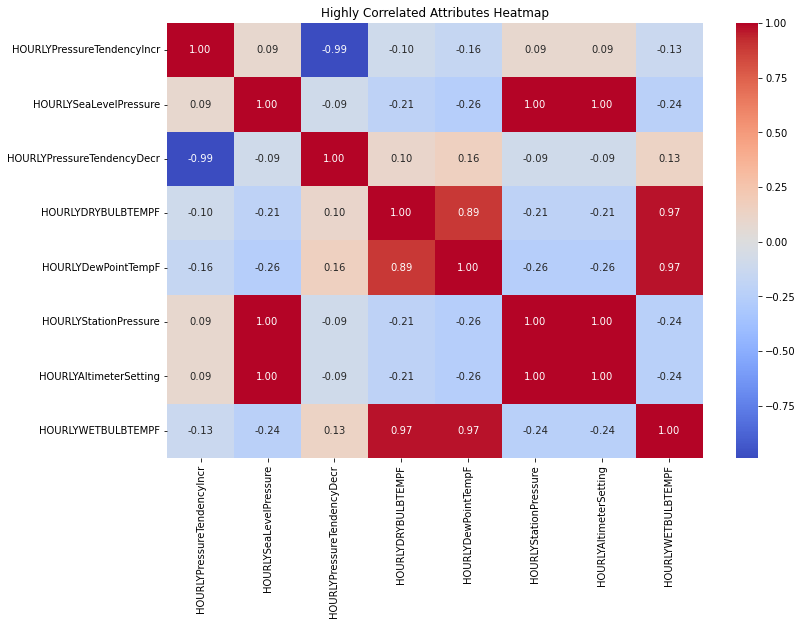

In [87]:
# Compute the correlation matrix
correlation_matrix = df1.corr()

# Set a threshold for correlation
threshold = 0.7

# Find attributes with correlations greater than the threshold
highly_correlated_attributes = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            attr1 = correlation_matrix.columns[i]
            attr2 = correlation_matrix.columns[j]
            highly_correlated_attributes.add(attr1)
            highly_correlated_attributes.add(attr2)

# Convert the set to a list for easy inspection
highly_correlated_attributes_list = list(highly_correlated_attributes)

# Print the highly correlated attributes
print("Attributes with correlation > 0.7:", highly_correlated_attributes_list)

# Create a heatmap to visualize the correlations of highly correlated attributes
plt.figure(figsize=(12, 8))
sns.heatmap(df1[highly_correlated_attributes_list].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Highly Correlated Attributes Heatmap')
plt.show()

In [88]:
# Create a new DataFrame with highly correlated attributes
new_df = df1[highly_correlated_attributes_list]

# Concatenate the "DATE" column from the original DataFrame "df"
new_df["DATE"] = df["DATE"]
# Get the number of attributes (columns)
num_attributes = len(new_df.columns)

print("Number of attributes:", num_attributes)

Number of attributes: 9


C:\Users\MRDEA0~1.NAD\AppData\Local\Temp/ipykernel_6836/1615668631.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["DATE"] = df["DATE"]


In [89]:
new_df

,HOURLYPressureTendencyIncr,HOURLYSeaLevelPressure,HOURLYPressureTendencyDecr,HOURLYDRYBULBTEMPF,HOURLYDewPointTempF,HOURLYStationPressure,HOURLYAltimeterSetting,HOURLYWETBULBTEMPF,DATE
0,0,29.99,1,33.0,31.0,29.97,29.99,32.0,2010-01-01 01:00:00
1,0,29.99,1,33.0,32.0,29.97,29.99,33.0,2010-01-01 02:00:00
2,0,29.99,1,33.0,32.0,29.97,29.99,33.0,2010-01-01 03:00:00
3,0,29.97,1,33.0,32.0,29.95,29.97,33.0,2010-01-01 04:00:00
4,0,29.96,1,33.0,31.0,29.93,29.95,32.0,2010-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...
75114,1,30.02,0,76.0,72.0,30.00,30.02,73.0,2018-07-27 19:00:00
75115,1,30.01,0,69.0,69.0,29.99,30.01,69.0,2018-07-27 20:00:00
75116,1,30.04,0,71.0,70.0,30.02,30.04,70.0,2018-07-27 21:00:00
75117,1,30.02,0,72.0,70.0,30.00,30.02,71.0,2018-07-27 22:00:00


In [90]:
new_df.to_csv("Cleaned_Dataset.csv",index=False)

In [29]:
# # Filter the correlation matrix for values between 0.5 and 1
# filtered_corr_matrix = correlation_matrix[(correlation_matrix > 0.8) & (correlation_matrix < 1)]

# # Find columns with complete values
# complete_columns = df1.columns[df1.count() == len(df1)]

# # Extract columns that meet the correlation and completeness criteria
# filtered_columns = filtered_corr_matrix.columns & complete_columns

# # Create a new DataFrame with the filtered columns
# filtered_df = df1[filtered_columns]
# filtered_df


# # Rename the column as "DATE"


# # Display the result

# # Plot each high correlation pair individually

# # In this code:

# # The correlation matrix is computed as before using data.corr().

# # The line high_corr_attributes = correlation_matrix[correlation_matrix > 0.50] selects attributes with correlations greater than 0.50. It creates a DataFrame containing correlation values.

# # The next line high_corr_attributes = high_corr_attributes[high_corr_attributes < 1.0] removes correlations of 1.0, as they're trivial and not informative.

# # high_corr_attributes = high_corr_attributes.dropna(how='all', axis=0).dropna(how='all', axis=1) drops rows and columns where all values are NaN.

# # The nested loops iterate through the high correlation attributes and create scatter plots for each pair. This will allow you to visualize the relationship between the attributes with a correlation greater than 0.50.

# # Replace 'your_data.csv' with the actual file path or appropriate method to load your dataset.

# # Please note that this approach will create scatter plots for all pairs of attributes with correlations greater than 0.50. Depending on the number of attributes and their combinations, you might end up with multiple plots.







C:\Users\MRDEA0~1.NAD\AppData\Local\Temp/ipykernel_6836/2505466265.py:8: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  filtered_columns = filtered_corr_matrix.columns & complete_columns


,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
0,6.0,33.0,32.0,31.0,92.0,0.0,29.97,29.99,0.01,29.99,0.000000,1.000000,0,1,0
1,6.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.02,29.99,0.000000,1.000000,0,1,0
2,5.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.00,29.99,0.000000,1.000000,0,1,0
3,5.0,33.0,33.0,32.0,96.0,0.0,29.95,29.97,0.00,29.97,0.000000,1.000000,0,1,0
4,5.0,33.0,32.0,31.0,92.0,0.0,29.93,29.96,0.00,29.95,0.000000,1.000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75114,10.0,76.0,73.0,72.0,88.0,3.0,30.00,30.02,0.00,30.02,-0.766044,-0.642788,1,0,0
75115,4.0,69.0,69.0,69.0,100.0,13.0,29.99,30.01,1.16,30.01,0.642788,0.766044,1,0,0
75116,10.0,71.0,70.0,70.0,96.0,0.0,30.02,30.04,0.01,30.04,0.000000,1.000000,1,0,0
75117,10.0,72.0,71.0,70.0,94.0,5.0,30.00,30.02,0.00,30.02,0.766044,0.642788,1,0,0


In [33]:
# # Combine the Series using pd.concat and axis=1 for column-wise concatenation
# df = pd.DataFrame(df)
# highly_correlated_attributes_list = pd.DataFrame(highly_correlated_attributes_list)

# # Concatenate df column as "DATE" into df1
# result_df = pd.concat([highly_correlated_attributes_list, df["DATE"]], axis=1)

# result_df.to_csv("Cleaned_Dataset.csv",index=False)

In [31]:
# Get the number of attributes (columns)
num_attributes = len(result_df.columns)

print("Number of attributes:", num_attributes)

Number of attributes: 16


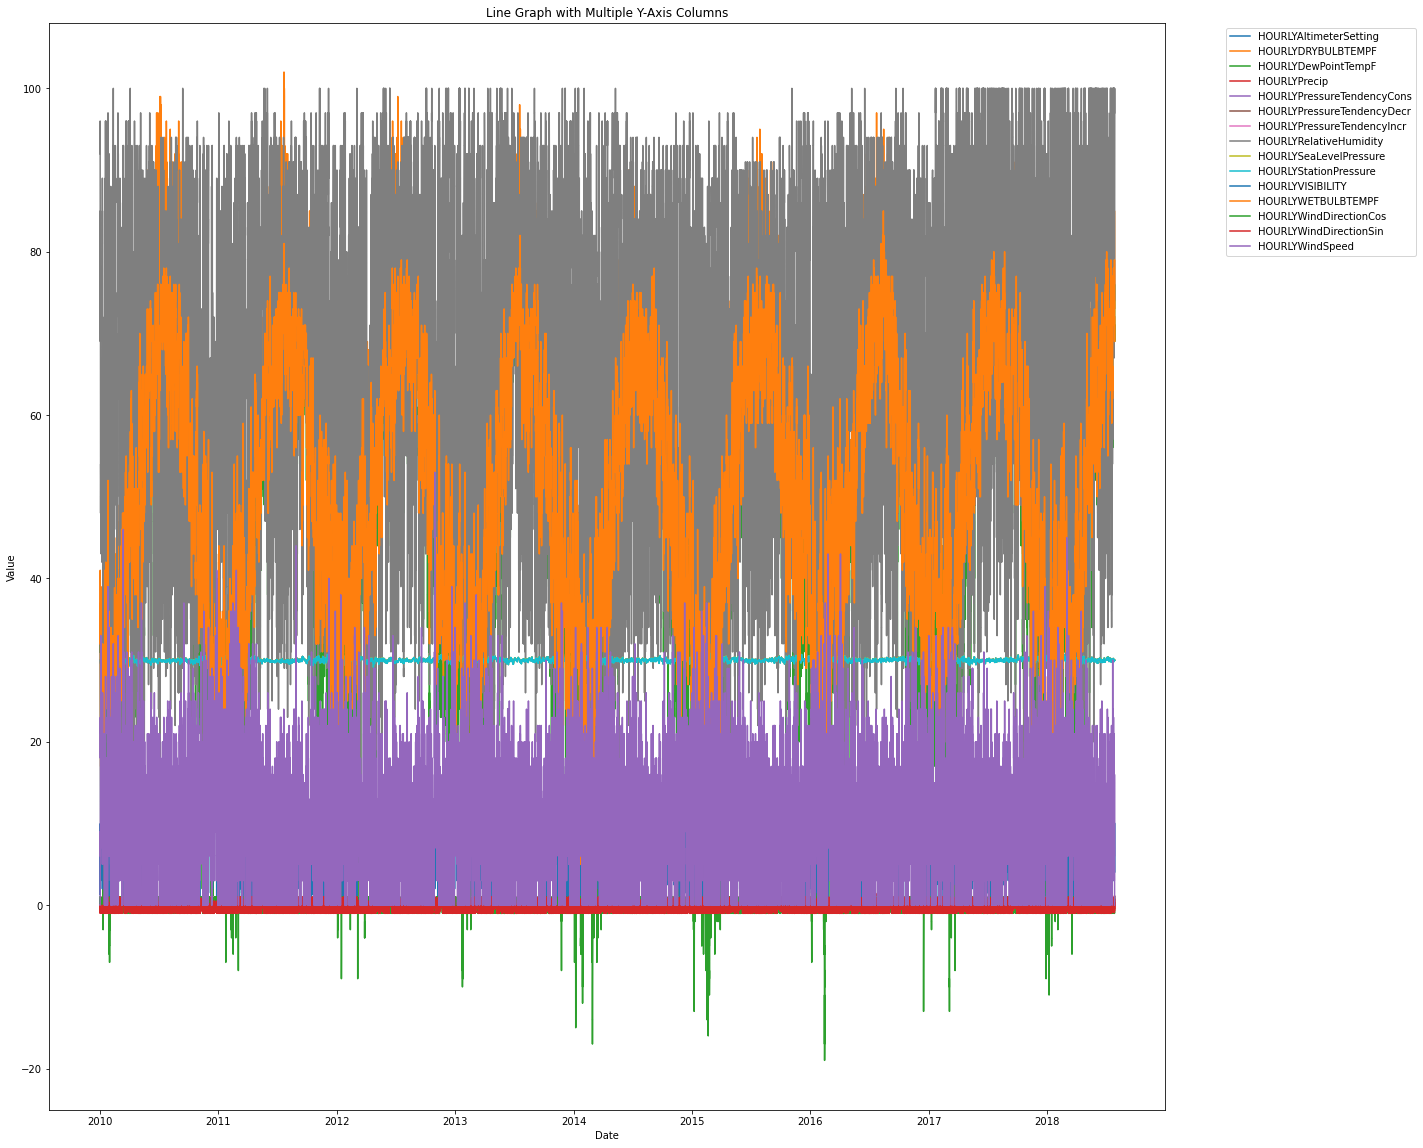

In [12]:
# # Extract the 'DATE' column for the x-axis
# x = pd.to_datetime(result_df['DATE'])

# # Select all other columns as y-axis data
# y_columns = result_df.columns.difference(['DATE'])

# # Create a line plot for each y-axis column
# plt.figure(figsize=(20, 20))  # Adjust the figure size as needed

# for col in y_columns:
#     plt.plot(x, df[col], label=col)

# # Customize the plot (labels, titles, legend, etc.)
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.title('Line Graph with Multiple Y-Axis Columns')
# plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# # Show the plot or save it to a file
# plt.show()

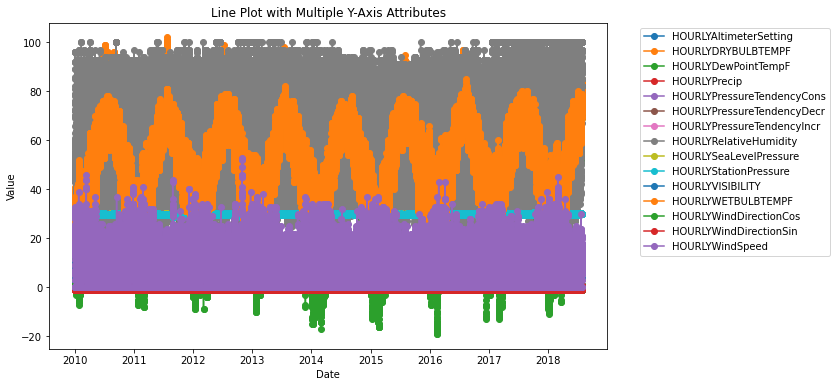

In [92]:
# # Extract the 'DATE' column for the x-axis
# x = pd.to_datetime(result_df['DATE'])

# # Select the attributes to plot on the y-axis (all columns except 'DATE')
# y_columns = result_df.columns.difference(['DATE'])

# # Define colors for the lines
# #colors = ['b', 'g', 'r']  # You can customize the colors as needed

# # Create a line plot for each attribute with different colors
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# for i, col in enumerate(y_columns):
#     plt.plot(x, result_df[col], marker='o', linestyle='-', label=col)

# # Customize the plot (labels, title, legend, etc.)
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.title('Line Plot with Multiple Y-Axis Attributes')
# plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# # Show the plot
# plt.show()

ValueError: x and y must have same first dimension, but have shapes (75119,) and (15,)

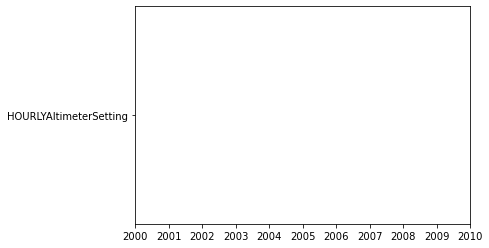

In [87]:
# # Create a line plot
# plt.plot(x, y_columns, marker='o', linestyle='-', color='b', label='Line 1')

# # Customize the plot (labels, title, etc.)
# plt.xlabel('X-Axis Label')
# plt.ylabel('Y-Axis Label')
# plt.title('Simple Line Graph')

# # Add a legend
# #plt.legend()

# # Show the plot
# plt.show()

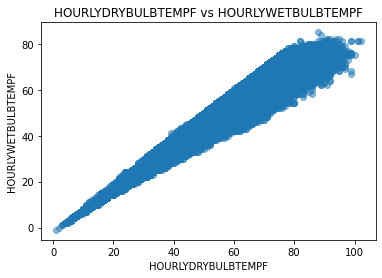

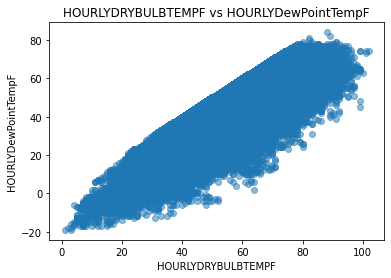

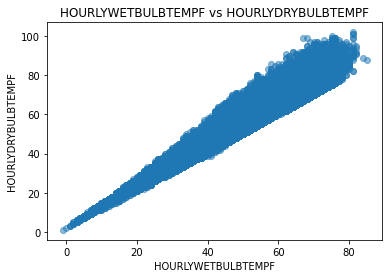

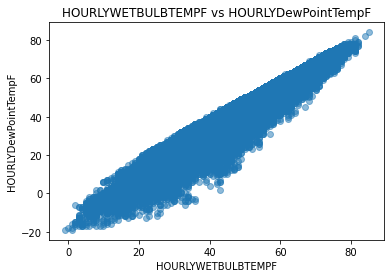

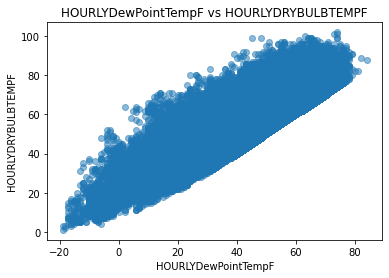

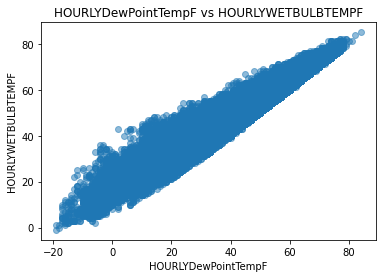

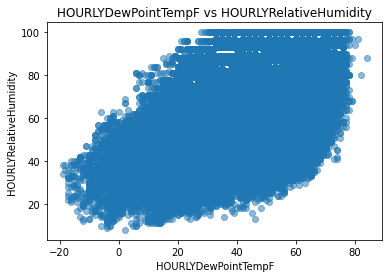

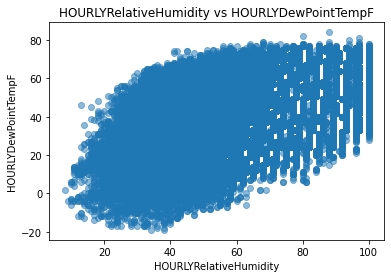

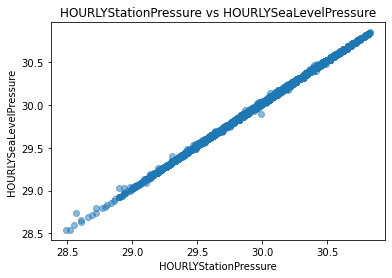

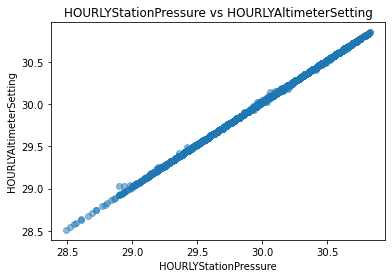

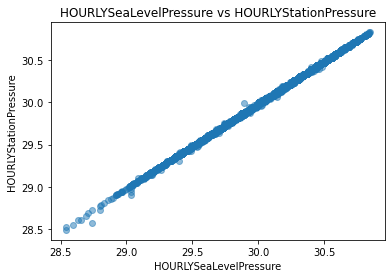

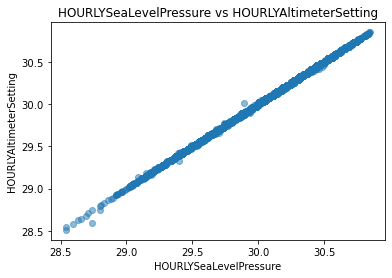

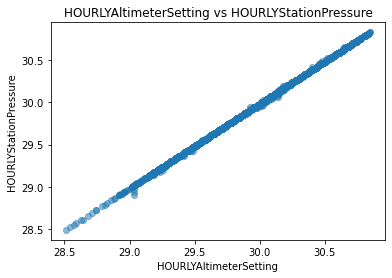

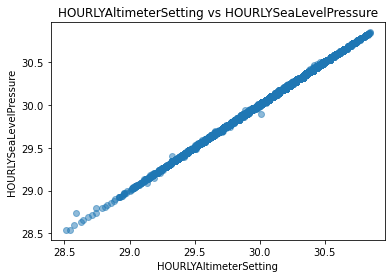

In [7]:
# # Plot each high correlation pair individually

# for col1 in high_corr_attributes.columns:
#     for col2 in high_corr_attributes.index:
#         if not pd.isnull(high_corr_attributes.loc[col2, col1]):
#             plt.figure(figsize=(6, 4))
#             plt.scatter(df[col1], df[col2], alpha=0.5)
#             plt.xlabel(col1)
#             plt.ylabel(col2)
#             plt.title(f'{col1} vs {col2}')
#             plt.show()

In [9]:
# # Convert 'DATE' column to datetime format and set it as index
# df['DATE'] = pd.to_datetime(df['DATE'])
# df.set_index('DATE', inplace=True)

### Here is we get just those Attributes Who depend on each other at time Correleation more than 0.7.

In [91]:
selected_attributes = ['HOURLYPressureTendencyIncr','HOURLYSeaLevelPressure','HOURLYPressureTendencyDecr','HOURLYDRYBULBTEMPF','HOURLYDewPointTempF','HOURLYStationPressure','HOURLYAltimeterSetting','HOURLYWETBULBTEMPF']
data_selected = new_df[selected_attributes]


In [92]:
# Split the data into training and test sets
train_size = int(0.8 * len(data_selected))
train_data = data_selected[:train_size]
test_data = data_selected[train_size:]


In [93]:
from statsmodels.tsa.api import VAR
# Fit the VAR model
model = VAR(train_data)
model_fitted = model.fit()


In [94]:
forecast = model_fitted.forecast(train_data.values, steps=len(test_data))
forecast_df = pd.DataFrame(forecast, columns=train_data.columns)
forecast_df.index = test_data.index


In [95]:
# Evaluate the model's performance
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_data, forecast_df)
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 10.92899107290294


In [74]:
# import pandas as pd
# from statsmodels.tsa.api import VAR
# from sklearn.metrics import mean_squared_error

# # Load your dataset into a DataFrame (replace 'your_dataset.csv' with your actual dataset file)

# # Select the desired attributes
# selected_attributes = ['HOURLYPressureTendencyIncr', 'HOURLYSeaLevelPressure', 'HOURLYPressureTendencyDecr',
#                        'HOURLYDRYBULBTEMPF', 'HOURLYDewPointTempF', 'HOURLYStationPressure',
#                        'HOURLYAltimeterSetting', 'HOURLYWETBULBTEMPF']
# data_selected = new_df[selected_attributes]

# # Handle missing values by dropping rows with missing values
# data_selected.dropna(inplace=True)

# # Split the data into training and test sets
# train_size = int(0.8 * len(data_selected))
# train_data = data_selected[:train_size]
# test_data = data_selected[train_size:]

# # Fit the VAR model
# model = VAR(train_data)
# model_fitted = model.fit()

# # Forecast using the VAR model
# forecast = model_fitted.forecast(train_data.values, steps=len(test_data))
# forecast_df = pd.DataFrame(forecast, columns=train_data.columns)
# forecast_df.index = test_data.index

# # Calculate the Mean Squared Error (MSE)
# mse = mean_squared_error(new_df.drop(columns=['DATE'],), forecast_df.drop(columns=['DATE']))
# rmse = mse ** 0.5
# print(f"Root Mean Squared Error: {rmse}")


# R-Squared

In [16]:
# from sklearn.metrics import r2_score
# # Calculate R-squared for each attribute
# r_squared_values = {}
# for column in forecast_df.columns:
#     r_squared = r2_score(test_data[column], forecast_df[column])
#     r_squared_values[column] = r_squared

# print("R-squared values:")
# for attribute, r_squared in r_squared_values.items():
#     print(f"{attribute}: {r_squared:.4f}")

R-squared values:
HOURLYDRYBULBTEMPF: -0.0207
HOURLYWETBULBTEMPF: -0.0039
HOURLYDewPointTempF: 0.0025
HOURLYRelativeHumidity: -0.0555
HOURLYStationPressure: -0.0095
HOURLYSeaLevelPressure: -0.0095
HOURLYAltimeterSetting: -0.0095


# Residual Error

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


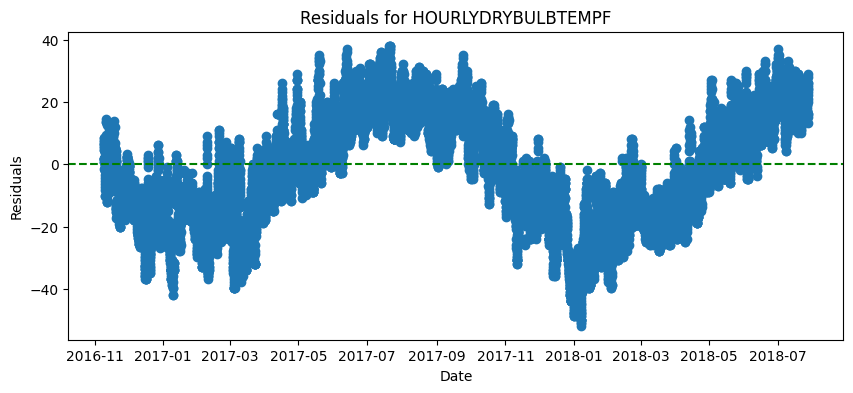

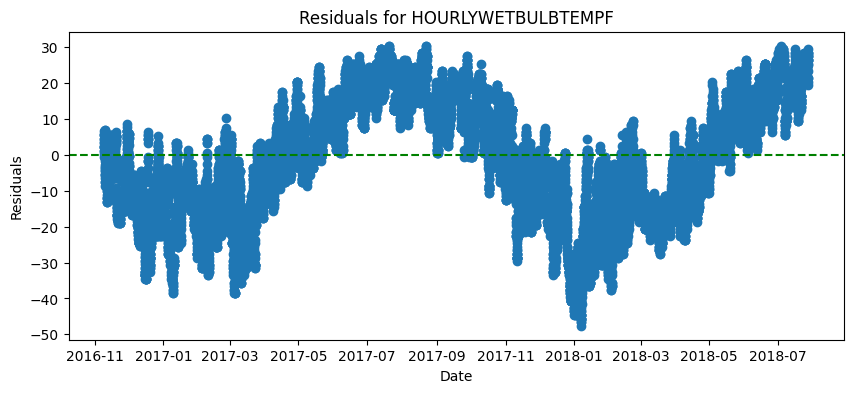

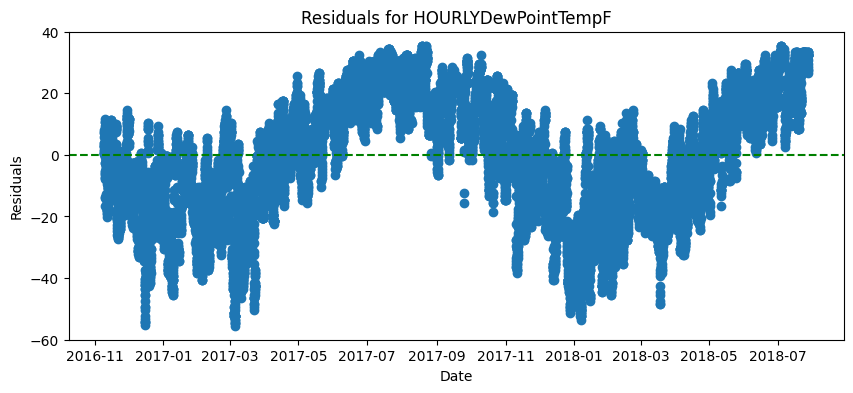

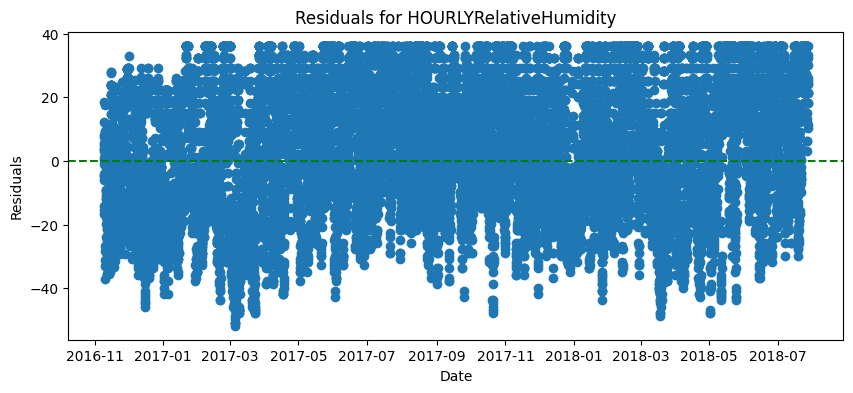

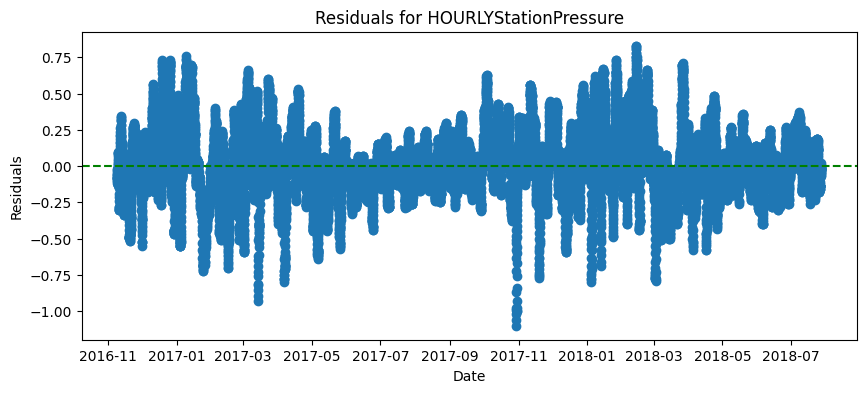

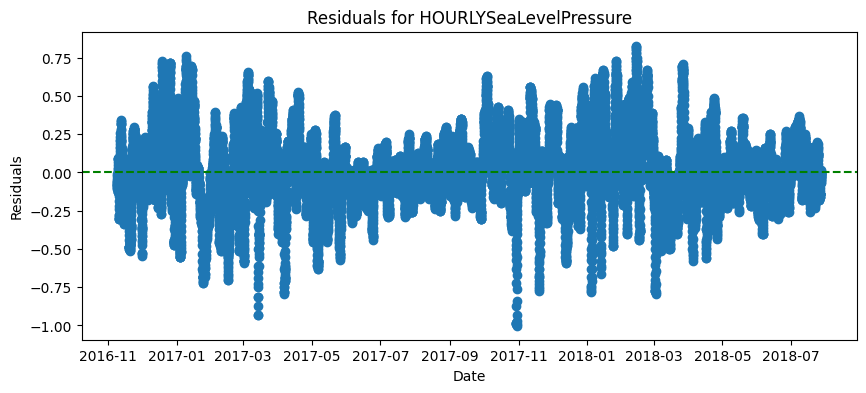

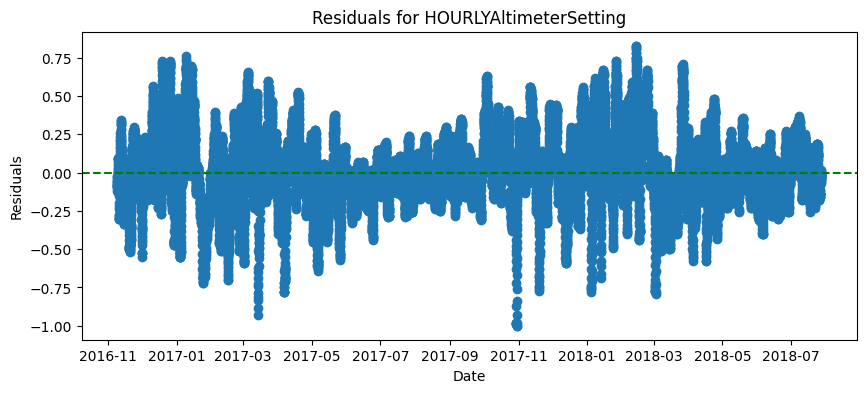

In [17]:
# # Train the VAR model and make predictions
# model = VAR(train_data)
# model_fitted = model.fit()
# forecast = model_fitted.forecast(train_data.values, steps=len(test_data))
# forecast_df = pd.DataFrame(forecast, columns=train_data.columns)
# forecast_df.index = test_data.index

# # Calculate residuals
# residuals = test_data - forecast_df

# # Plot residuals
# for column in residuals.columns:
#     plt.figure(figsize=(10, 4))
#     plt.plot(residuals.index, residuals[column], marker='o', linestyle='None')
#     plt.axhline(y=0, color='g', linestyle='--')
#     plt.xlabel('Date')
#     plt.ylabel('Residuals')
#     plt.title(f'Residuals for {column}')
#     plt.show()

# Root Mean Square Error

In [18]:
# import pandas as pd
# from sklearn.metrics import mean_squared_error
# import numpy as np

# # Load your dataset
# # Replace 'your_data.csv' with the actual file path
# data = pd.read_csv('jfk_weather_data_Set.csv')

# # Replace 'predicted_column' and 'actual_column' with the column names you're interested in
# predicted_column = 'HOURLYDRYBULBTEMPF'
# actual_column = 'HOURLYWETBULBTEMPF'

# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(data[actual_column], data[predicted_column]))

# print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Root Mean Squared Error (RMSE): 7.3908


# Irrelevant

In [ ]:
column_to_drop = 'DATE'
df.drop(column_to_drop,axis=1,inplace=True)

In [ ]:
# Display the first few rows of the dataset
print(df.head())

# Get basic statistics about the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   HOURLYVISIBILITY  HOURLYDRYBULBTEMPF  HOURLYWETBULBTEMPF  \
0               6.0                33.0                32.0   
1               6.0                33.0                33.0   
2               5.0                33.0                33.0   
3               5.0                33.0                33.0   
4               5.0                33.0                32.0   

   HOURLYDewPointTempF  HOURLYRelativeHumidity  HOURLYWindSpeed  \
0                 31.0                    92.0              0.0   
1                 32.0                    96.0              0.0   
2                 32.0                    96.0              0.0   
3                 32.0                    96.0              0.0   
4                 31.0                    92.0              0.0   

   HOURLYStationPressure  HOURLYSeaLevelPressure  HOURLYPrecip  \
0                  29.97                   29.99          0.01   
1                  29.97                   29.99          0.02   
2                  2

In [ ]:
# Columns to be scaled
columns_to_scale = ['HOURLYVISIBILITY', 'HOURLYDRYBULBTEMPF', 'HOURLYWETBULBTEMPF', 'HOURLYDewPointTempF',
                    'HOURLYRelativeHumidity', 'HOURLYWindSpeed', 'HOURLYStationPressure',
                    'HOURLYSeaLevelPressure', 'HOURLYPrecip', 'HOURLYAltimeterSetting',
                    'HOURLYWindDirectionSin', 'HOURLYWindDirectionCos',
                    'HOURLYPressureTendencyIncr', 'HOURLYPressureTendencyDecr', 'HOURLYPressureTendencyCons']
#Min-Max-Scalling
scaler = MinMaxScaler()


In [ ]:
df.head()

,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
0,6.0,33.0,32.0,31.0,92.0,0.0,29.97,29.99,0.01,29.99,0.0,1.0,0,1,0
1,6.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.02,29.99,0.0,1.0,0,1,0
2,5.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.00,29.99,0.0,1.0,0,1,0
3,5.0,33.0,33.0,32.0,96.0,0.0,29.95,29.97,0.00,29.97,0.0,1.0,0,1,0
4,5.0,33.0,32.0,31.0,92.0,0.0,29.93,29.96,0.00,29.95,0.0,1.0,0,1,0


In [ ]:
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Describe the scaled columns
#print(df[columns_to_scale].describe())

# Describe the entire DataFrame
#print(df.describe())
df.head()


,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
0,0.6,0.316832,0.383721,0.485437,0.913043,0.0,0.632479,0.627706,0.004149,0.632479,0.5,1.0,0.0,1.0,0.0
1,0.6,0.316832,0.395349,0.495146,0.956522,0.0,0.632479,0.627706,0.008299,0.632479,0.5,1.0,0.0,1.0,0.0
2,0.5,0.316832,0.395349,0.495146,0.956522,0.0,0.632479,0.627706,0.000000,0.632479,0.5,1.0,0.0,1.0,0.0
3,0.5,0.316832,0.395349,0.495146,0.956522,0.0,0.623932,0.619048,0.000000,0.623932,0.5,1.0,0.0,1.0,0.0
4,0.5,0.316832,0.383721,0.485437,0.913043,0.0,0.615385,0.614719,0.000000,0.615385,0.5,1.0,0.0,1.0,0.0


In [ ]:

X = df.drop('HOURLYVISIBILITY', axis=1)  # Replace 'target_column_name' with the actual target column
y = df['HOURLYVISIBILITY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train a RandomForestRegressor (you can replace this with another model)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model on the test data
test_predictions = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, test_predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.017529362695926077


In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have loaded your preprocessed data into a DataFrame called 'df'

# Define your features and target variable
X = new_df.drop('HOURLYPressureTendencyIncr', axis=1)  # Features excluding the target column
y = new_df['HOURLYPressureTendencyIncr']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize regression models
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Support Vector Regression", SVR()),
    ("Random Forest Regressor", RandomForestRegressor()),
    ("Gradient Boosting Regressor", GradientBoostingRegressor())
]

# Dictionary to store Mean Squared Error for each model
mse_dict = {}

# Train and evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_dict[name] = mse

    r2 = r2_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("="*50)

# Find the model with maximum Mean Squared Error
max_mse_model = max(mse_dict, key=mse_dict.get)
print(f"The model with maximum Mean Squared Error: {max_mse_model}")


ValueError: could not convert string to float: '2016-07-27 12:00:00'